In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from userfunctions import *

In [2]:
#plt.style.use('default')
sns.set()

In [3]:
#загрузили исходные данные
df_raw = pd.read_excel(r'Prioksk_Air_in.xlsx')
#очистили их от того, что не потребуется и что может привести к ошибкам
df = PrepareDataFrame(df_raw.copy())
#создадим копию для удобства
data_total = df.copy()
winter_data, spring_data, summer_data, autumn_data = PrepareSeasonalDataFrame(df.copy())

Некорректные строки удалены:

        YY  MM  DD  TSP  SO2  SO4   HG   PB   CD  NO2
5187  1998   9  31  NaN  0.0  NaN  NaN  NaN  NaN  NaN


# SO4

In [4]:
ELEM_NAME = 'SO4'
ELEM = CreateDataBySeasons(ELEM_NAME
                           , data_total, winter_data, spring_data, summer_data, autumn_data
                           , with_zero=True)
VALUES = ExtractValues(ELEM)

if CountZerosInData(VALUES['all'], ELEM_NAME) > 0:
    #НЕ словарь, просто массив по полной выборке соответ-го элемента
    ELEM_NOT_NULL = CreateDataBySeasons(ELEM_NAME
                                        , data_total, winter_data, spring_data, summer_data, autumn_data
                                        , with_zero=False)
    VALUES_NOT_NULL = ExtractValues(ELEM_NOT_NULL)
else:
    VALUES_NOT_NULL = VALUES

Число нулевых элементов в полной выборке SO4: 10



Гистограмма для полной выборки SO4


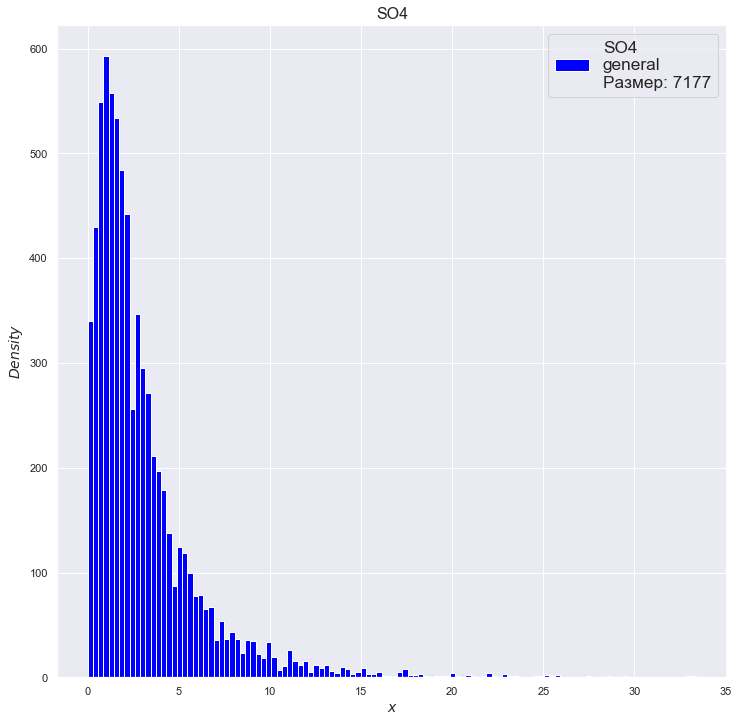

In [5]:
HistOnSample(VALUES['all'],ELEM_NAME)

In [15]:
start = datetime.datetime.now()
distr_ks, params_ks, p_v_ks, distr_chi2, params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL['all'])
print ('\nTook time: {0}'.format(datetime.datetime.now()-start))


Chi2
Best fitting distribution: ncf
Best p value: 0.7576028051180713
Parameters for the best fit: (6.742026933354746e-05, 5.642603801422675, 10.281071422221867, 0.004999999693751417, 1.365735246055038e-05)

K-S
Best fitting distribution: ncf
Best p value: 0.7069186418170591
Parameters for the best fit: (6.742026933354746e-05, 5.642603801422675, 10.281071422221867, 0.004999999693751417, 1.365735246055038e-05)

Took time: 0:00:41.971178


In [358]:
distr_params_all = defaultdict(dict)
if p_v_ks >= 0.05:
    distr_params_all['general'][distr_ks] = params_ks
if p_v_chi2 >= 0.05:
    distr_params_all['general'][distr_chi2] = params_chi2

Text(0.5, 1.0, 'SO4')

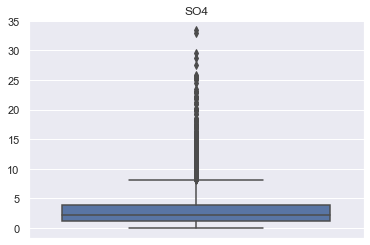

In [6]:
#sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(VALUES['all'],orient='v').set_title(ELEM_NAME)

In [360]:
SizeSample(VALUES['all'], ELEM_NAME)
k = CountZerosInData(VALUES['all'], ELEM_NAME)
CountByTreshold(VALUES['all'], ELEM_NAME, 1 , 0.1)

Размер полной выборки для SO4 равен 7177
Число нулевых элементов в полной выборке SO4: 10

Посмотрим на число элементов выше и ниже некоторых порогов для выборки SO4

Порог: 0.0, значений выше: 7167, ниже: 10
Порог: 0.1, значений выше: 6994, ниже: 183
Порог: 0.2, значений выше: 6888, ниже: 289
Порог: 0.30000000000000004, значений выше: 6762, ниже: 415
Порог: 0.4, значений выше: 6621, ниже: 556
Порог: 0.5, значений выше: 6459, ниже: 718
Порог: 0.6000000000000001, значений выше: 6315, ниже: 862
Порог: 0.7000000000000001, значений выше: 6129, ниже: 1048
Порог: 0.8, значений выше: 5916, ниже: 1261
Порог: 0.9, значений выше: 5695, ниже: 1482
Порог: 1.0, значений выше: 5505, ниже: 1672


Построение графика всей выборки для SO4


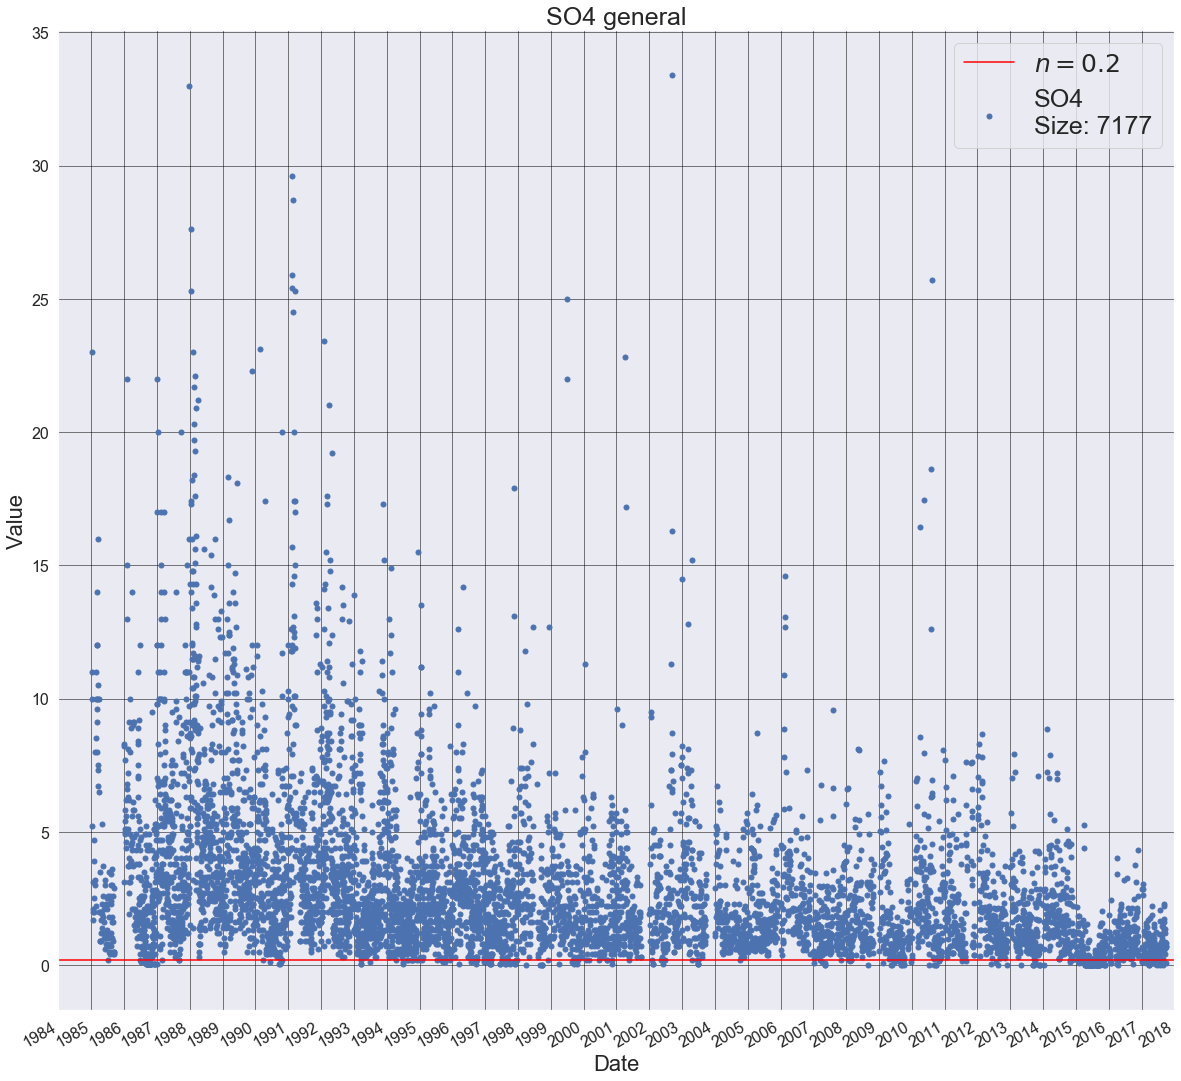

In [7]:
PlotElement(ELEM['all'],ELEM_NAME,'general',20,20,0.2)

Гистограмма 0-1 теста Колмогорова-Смирнова для выборки SO4


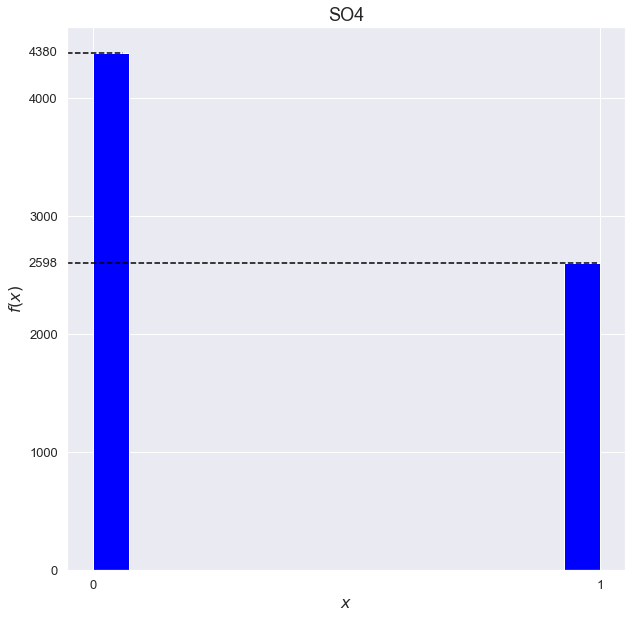

In [8]:
HistOnKSTest2Sample(KSTest2Sample(VALUES['all']), ELEM_NAME)

Принимаем гипотезу однородности К-С, если p-value > 0.05, сопоставляем ей 1, иначе 0
Число подряд идущих 1 - синим цветом, 0 - серым 


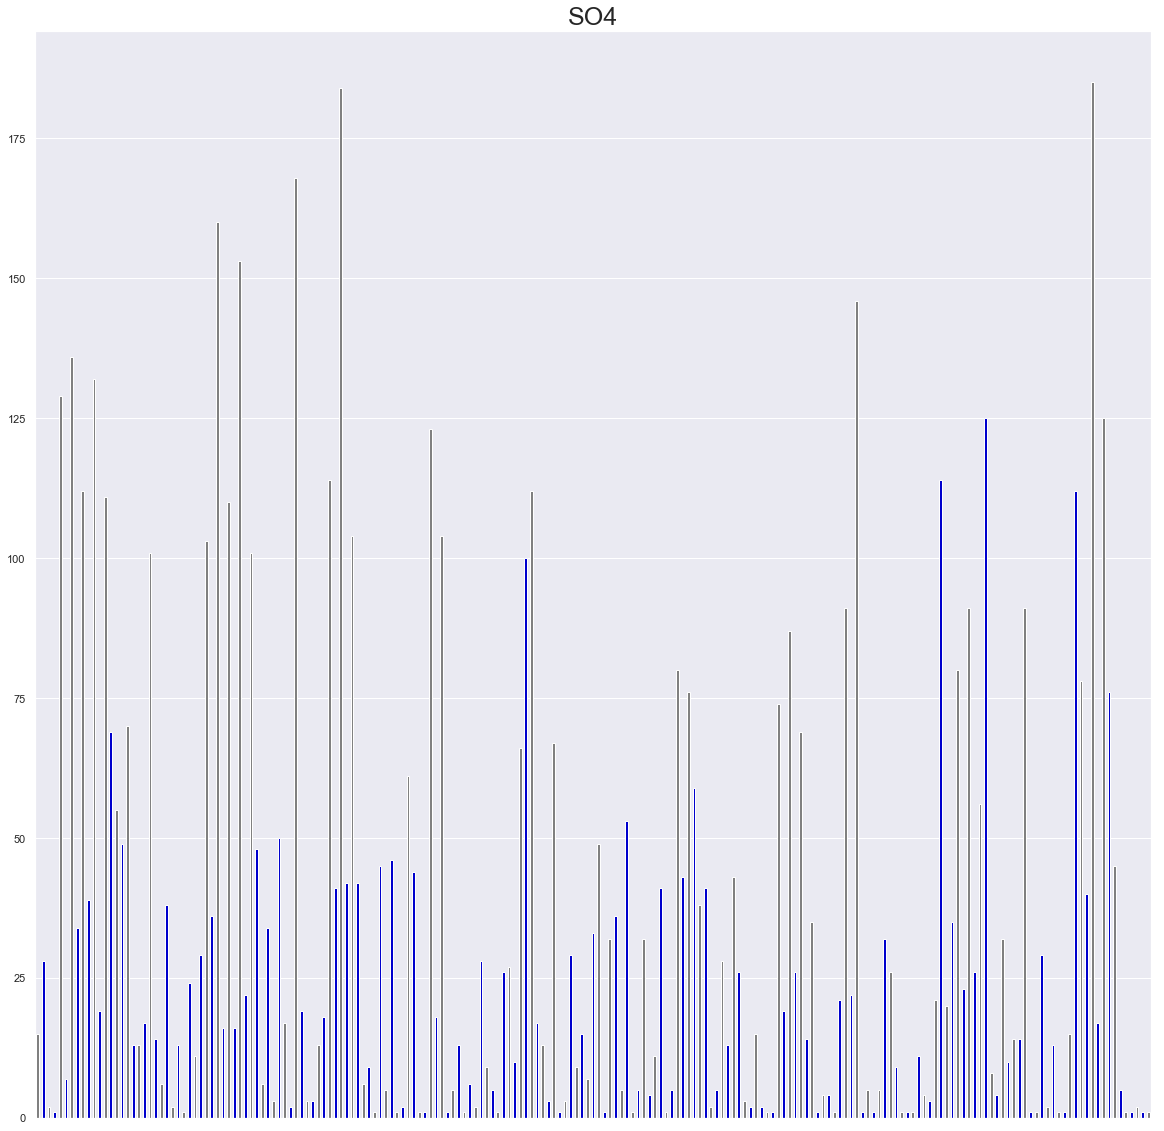

In [363]:
HistOnRepValues(RepeatedValuesCount(KSTest2Sample(VALUES['all'])),ELEM_NAME)

Поделим выборку на train и test (90 к 10), по 1-й оценим параметры, по 2-й проверим гипотезу о согласии К-С и Хи-квадрат для Гамма распределения

In [19]:
#GAMMA

test_size = 0.1

while True: 
    train, test = train_test_split(VALUES_NOT_NULL['all'], test_size=test_size)
    params = FitParams(train,'gamma', floc=0)
    s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params)
    s_ks, p_ks = KSOnTest(test, 'gamma', params)
    if p_chi2 >= 0.1 and p_ks >= 0.1:
        break
        
print('shape,loc,scale = {0}, p_v on Chi2 = {1}, p_v on KS = {2}'.format(params, p_chi2, p_ks))
#based on chi2 and ks
#SO4
#shape,loc,scale = (1.1812266020050666, 0, 2.583799773183274), 
#p_v on Chi2 = 0.07386822862069643, p_v on KS = 0.06341678885027001


shape,loc,scale = (1.1774795114909946, 0, 2.595671162492644), p_v on Chi2 = 0.4342123081048433, p_v on KS = 0.13521141323625338


In [367]:
distr_params_all['general']['gamma'] = params

Гистограмма для выборки SO4, сезон - general
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


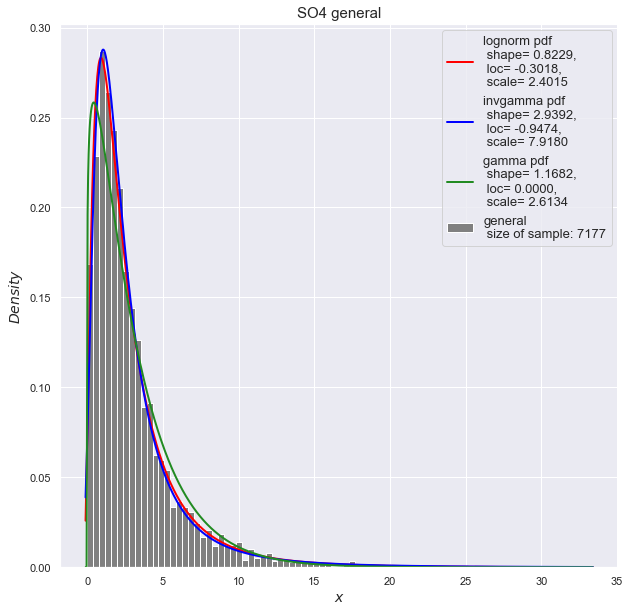

In [394]:
DistributionBySeason(VALUES['all'], ELEM_NAME, 'general', distr_params_all['general'])

In [370]:
distr_params_all

defaultdict(dict,
            {'general': {'lognorm': (0.8228636114086207,
               -0.30176481467484384,
               2.401515642793929),
              'invgamma': (2.93919764920512,
               -0.9473878957476671,
               7.9179816931529565),
              'gamma': (1.1682472866185503, 0, 2.6134061564995306)}})

In [371]:
#GAMMA
print('GAMMA\n')

stat, p_v = KSOnTest(test, 'gamma', params)
print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
stat, p_v = ChiSquareOnTest(test, 'gamma', params)
print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))

GAMMA

KS TEST:
Power_divergenceResult(statistic=0.04462257526512625, pvalue=0.11165543327233246)
CHISQARE TEST:
Power_divergenceResult(statistic=28.579064664883937, pvalue=0.19467328397259198)


## Рассмотрим сезонные выборки

In [372]:
params_seasons = {}

In [389]:
#GAMMA
seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons = {}
train_test_seasons = {}
for s in seasons:
    while True: 
        train, test = train_test_split(VALUES_NOT_NULL[s], test_size=0.2)
        params_seasons[s] = FitParams(train, 'gamma',floc=0)
        s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params_seasons[s])
        s_ks, p_ks = KSOnTest(test, 'gamma', params_seasons[s])
        if p_chi2 >= 0.1 and p_ks >=0.2:
            train_test_seasons[s] = [train, test]
            break
for s in seasons:
    print(s, ': ', params_seasons[s])

winter :  (1.3078260286016197, 0, 3.0898933293196444)
spring :  (1.2163807365337804, 0, 2.788941668981912)
summer :  (1.2427832738093452, 0, 1.826588199371887)
autumn :  (1.1364213433674832, 0, 2.296920329760054)


In [20]:
start = datetime.datetime.now()
seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons_ks,params_seasons_chi2 = defaultdict(dict), defaultdict(dict)
train_test_seasons1 = {}
for s in seasons:
    print()
    print(s.upper())
    print()
    distr_ks,params_ks,p_v_ks, distr_chi2,params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL[s])
    if p_v_ks >= 0.05:
        params_seasons_ks[s][distr_ks] = params_ks
    if p_v_chi2 >= 0.05:
        params_seasons_chi2[s][distr_chi2] = params_chi2
print('\nTook time: {0}'.format(datetime.datetime.now()-start))


WINTER


Chi2
Best fitting distribution: invgamma
Best p value: 0.5094204930025572
Parameters for the best fit: (3.1712376919645497, -1.365055413086855, 11.952698989634246)

K-S
Best fitting distribution: mielke
Best p value: 0.5397257202819087
Parameters for the best fit: (1.1862585187580947, 2.4900826823465008, 0, 4.772720510860097)

SPRING


Chi2
Best fitting distribution: lognorm
Best p value: 0.3508340130521351
Parameters for the best fit: (1.112515702996299, 0.0, 2.185861378799191)

K-S
Best fitting distribution: lognorm
Best p value: 0.06771877643648322
Parameters for the best fit: (1.112515702996299, 0.0, 2.185861378799191)

SUMMER


Chi2
Best fitting distribution: ncf
Best p value: 0.23660727045830834
Parameters for the best fit: (0.00010652415647025044, 6.464445505445568, 9.145256892726374, 0.004999999577021132, 1.894496079998414e-05)

K-S
Best fitting distribution: invgamma
Best p value: 0.1337776708803348
Parameters for the best fit: (3.787755112614459, -0.9178872240529088

In [390]:
distr_params_seasons = defaultdict(dict)
for s in seasons:
    try:
        distr_ks, params_ks = list(params_seasons_ks[s].keys())[0], list(params_seasons_ks[s].values())[0] 
        distr_params_seasons[s][distr_ks] = params_ks
    except IndexError:
        continue
for s in seasons:
    try:
        distr_chi2, params_chi2 = list(params_seasons_chi2[s].keys())[0], list(params_seasons_chi2[s].values())[0] 
        distr_params_seasons[s][distr_chi2] = params_chi2
    except IndexError:
        continue
for s in seasons:
    params_gamma = params_seasons[s]
    distr_params_seasons[s]['gamma'] = params_gamma
    

Гистограмма для выборки SO4, сезон - winter
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


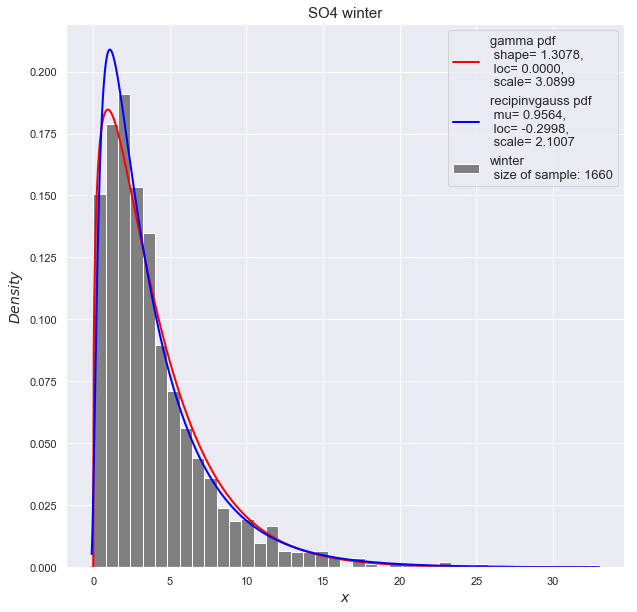

Гистограмма для выборки SO4, сезон - spring
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


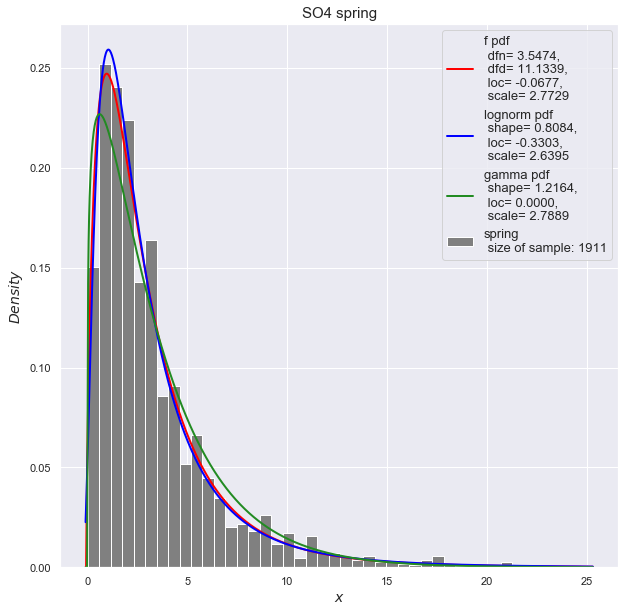

Гистограмма для выборки SO4, сезон - summer
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


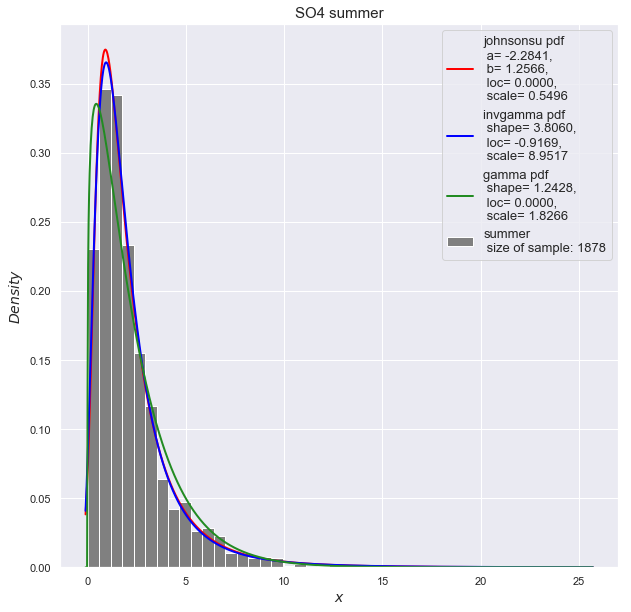

Гистограмма для выборки SO4, сезон - autumn
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


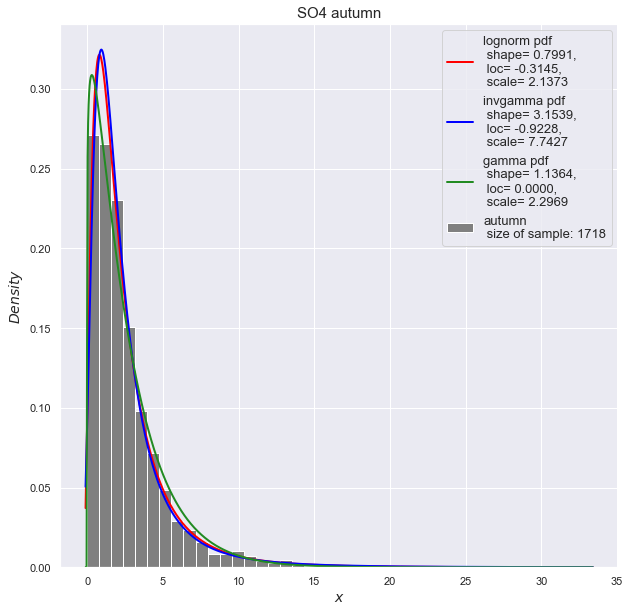

In [395]:
for s in seasons:
    DistributionBySeason(VALUES_NOT_NULL[s], ELEM_NAME, season=s,params_dict=distr_params_seasons[s])

### Проверка гипотезы о согласии Хи-квадрат и К-С для сезонных выборок для Гамма распределения
#### Для других подобранных распределений результаты выше

In [379]:
#GAMMA
for s in seasons:
    print(s.upper())
    print()
    stat, p_v = KSOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    stat, p_v = ChiSquareOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    print()

WINTER

KS TEST:
Power_divergenceResult(statistic=0.04279108942397103, pvalue=0.5764296590388452)
CHISQARE TEST:
Power_divergenceResult(statistic=119.990585720994, pvalue=1.900462159414491e-18)

SPRING

KS TEST:
Power_divergenceResult(statistic=0.039316394197071614, pvalue=0.596393801605143)
CHISQARE TEST:
Power_divergenceResult(statistic=34.660474685209635, pvalue=0.0044217846324298106)

SUMMER

KS TEST:
Power_divergenceResult(statistic=0.04452432540726148, pvalue=0.4373172198168952)
CHISQARE TEST:
Power_divergenceResult(statistic=199402.31118656028, pvalue=0.0)

AUTUMN

KS TEST:
Power_divergenceResult(statistic=0.05459161794230226, pvalue=0.24815284910126664)
CHISQARE TEST:
Power_divergenceResult(statistic=7556.813295952054, pvalue=0.0)



## Нарисуем 4 гамма распределения, полученные в результате работы ЕМ алгоритма
Выборка делилась на 4 части, учитывая след формулу "количество элементов за данное время года / вся выборка"

Использовался метод gammamixEM из R

In [ ]:
dic = {'x':VALUES_NOT_NULL['all']}
df = pd.DataFrame(dic, columns=['x'])
df.to_csv('SO4Pall.csv', index=False)

In [382]:
print('PROPORTIONS OF SEASON DATA FROM ALL DATA')
print('WINTER:', len(VALUES['winter'])/len(VALUES['all']), sep=' ')
print('SPRING:', len(VALUES['spring'])/len(VALUES['all']), sep=' ')
print('SUMMER:', len(VALUES['summer'])/len(VALUES['all']), sep=' ')
print('AUTUMN:', len(VALUES['autumn'])/len(VALUES['all']), sep=' ')

PROPORTIONS OF SEASON DATA FROM ALL DATA
WINTER: 0.2312944127072593
SPRING: 0.2666852445311411
SUMMER: 0.2622265570572663
AUTUMN: 0.2397937857043333


Веса: [0.228724, 0.2526548, 0.294748, 0.2238732]


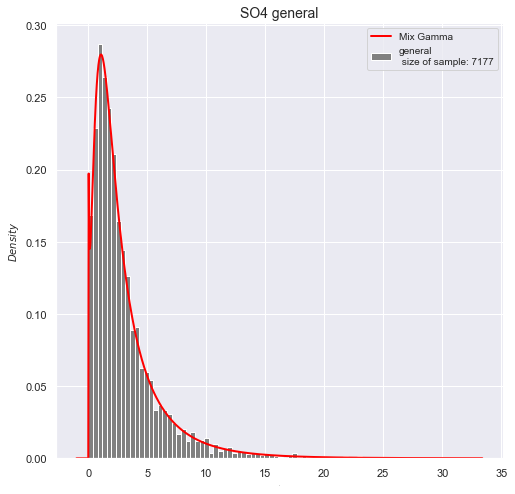

In [26]:
sh_loc_sc1, lamb1 = FormShLocScLamb('0.6161712 1.878395 2.7038812 2.574384', '6.0258740 2.321816 0.5805209 1.083856',
                                   '0.2287240 0.2526548 0.2947480 0.2238732')

x = np.linspace(-1, max(VALUES['all']),1000)

print('Веса: {0}'.format(lamb1))
fig3 = EMGammaMixPlot_4(sh_loc_sc1, lamb1)
fig3.savefig(ELEM_NAME+'_MixGamma.png', bbox_inches='tight', pad_inches=0)